<a href="https://colab.research.google.com/github/9-coding/DataScience/blob/main/%08clustering_mouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#drive mount
#구글 드라이브를 colab에서 사용할 수 있도록 마운트
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 


Mounted at /content/mnt


In [ ]:
%cd /content/mnt/MyDrive/Colab Notebooks/DataScience/dataset/

/content/mnt/MyDrive/Colab Notebooks/DataScience/dataset


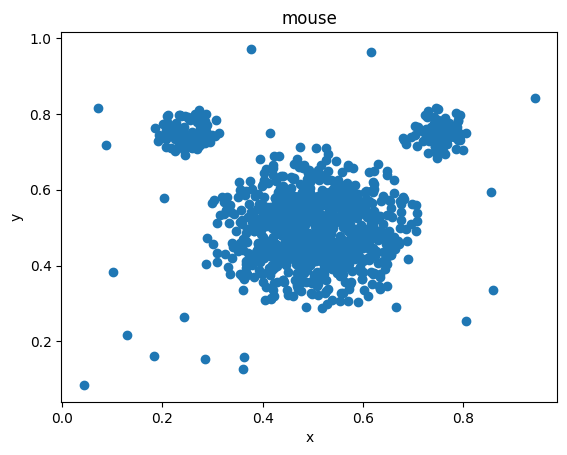

<ipython-input-47-d85d59f30505>:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 4, n)


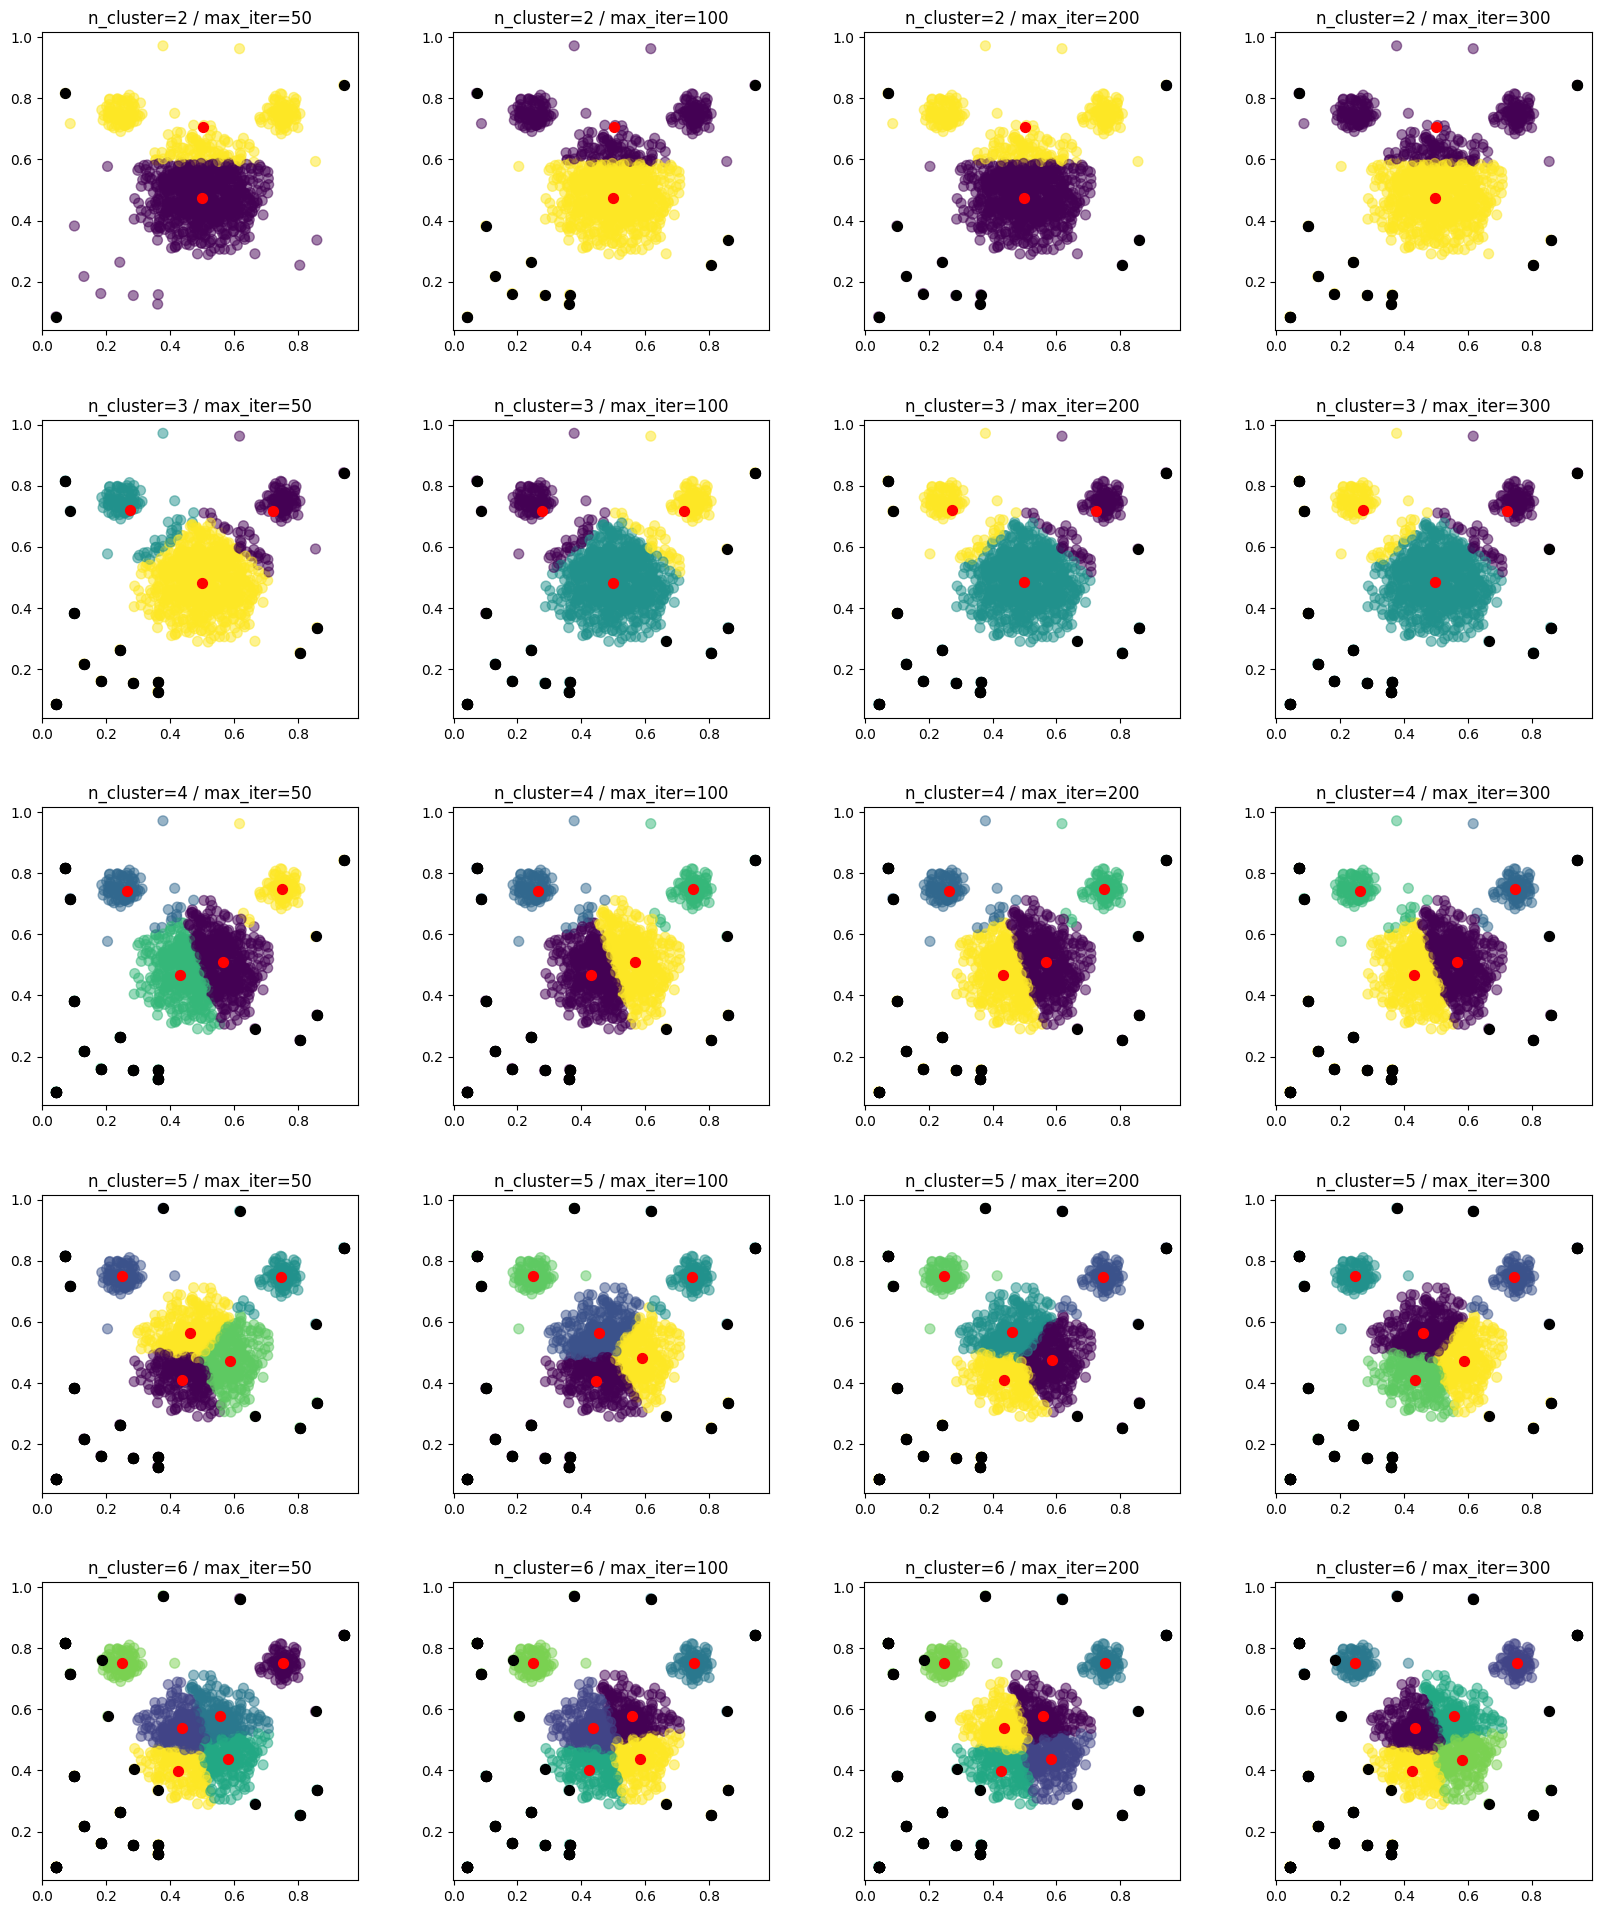

In [47]:
# A code that implements kmeans clustering by applying data in the mouse.csv file 
# differently with 2/3/4/5/6 clusters and 50/100/200/300 max_iter through the kmeans algorithm.
# Noise in the data is detected through kmeans.transform() and treated as black.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
data = np.loadtxt('/content/mnt/MyDrive/Colab Notebooks/DataScience/dataset/mouse.csv', delimiter=',')
data = data.reshape(-1, 2)  # Reshape the data array to have two columns

x = data[:, 0]
y = data[:, 1]

# Plot the scatterplot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('mouse')
plt.show()

# Perform k-means clustering
n_clusters = [2, 3, 4, 5, 6]
max_iters = [50, 100, 200, 300]

fig, ax = plt.subplots(figsize=(20, 24))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

outliar = []
n = 0
for n_cluster in n_clusters:
    for max_iter in max_iters:
        n += 1
        kmeans = KMeans(n_clusters=n_cluster, init='k-means++', n_init=10, max_iter=max_iter).fit(data)
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_

        # Scatter plot output with different number of clusters and number of iterations based on kmeans results
        plt.subplot(5, 4, n)
        plt.scatter(x, y, c=labels.astype(float), s=50, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.title('n_cluster=' + str(n_cluster) + ' / max_iter=' + str(max_iter))

        # Detect a noise
        distances = kmeans.transform(data)
        outlier_threshold = np.percentile(distances, 99.45)  # Set a threshold for outliers
        num = 0
        for i in range(data[:, 0].size):
          if (distances[i][0] > outlier_threshold):
            outliar.append([data[i][0],data[i][1]])
        noise = np.array(outliar)
        plt.scatter(noise[:, 0], noise[:, 1], c='black', s=50) # Print a noise

plt.show()
